In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from tqdm import tqdm
import itertools
import random
#import warnings
#warnings.filterwarnings('ignore')
#from pyeasyga import pyeasyga

In [2]:
def hill_activation(x, K, n, ymin, ymax):
    return  ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def hill_activation_and(x, K1, K2, n1, n2, ymin1, ymin2, ymax1, ymax2):
    x1, x2 = x
    return hill_activation(x1, K1, n1, ymin1, ymax1) * hill_activation(x2, K2, n2, ymin2, ymax2)

In [3]:
#fluos = pd.read_csv('datasets/induction_matrix_and/induction_fluos.csv', index_col='time')
#ods = pd.read_csv('datasets/induction_matrix_and/induction_ods.csv', index_col='time')
#gates = ['e11x32STPhoRadA', 'e15x32NpuSspS2', 'e16x33NrdA2', 'e20x32gp411', 'e32x30SspGyrB',
#         'e34x30MjaKlbA', 'e38x32gp418', 'e41x32NrdJ1', 'e42x32STIMPDH1']#, 'e16x30SspGyrB', 'e32x33NrdJ1']
#controls = ['positive_control', 'negative_control']

In [4]:
folder = '033-all-and-gates-characterization'
df_hill_params = pd.read_csv('datasets/experiment/{}/hill_params.csv'.format(folder))
hill_params = {}
for i, j in df_hill_params.iterrows():
    hill_params[j['gate']] = j.tolist()[1:]

In [5]:
gates = list(hill_params.keys())

In [ ]:
#both latest ara and cuma data
hill_params = {'e11x32STPhoRadA': [1.38609966e-02, 1.60895892e+02, 4.00000000e+00, 7.77066640e-01,
        8.47975638e-38, 1.40958159e-04, 6.03613733e+00, 6.03613733e+00],
 'e15x32NpuSspS2': [2.51938785e-02, 7.73416012e+00, 1.39580084e+00, 3.28358067e+00,
        1.21508540e-03, 1.21508540e-03, 1.08890566e+00, 1.08890566e+00],
 'e16x33NrdA2': [2.95748723e-02, 2.41023864e+01, 2.20839441e+00, 2.05342677e+00,
        1.03610762e-03, 1.03610762e-03, 6.61478933e+00, 6.61478933e+00],
 'e20x32gp411': [4.92310594e-02, 1.37152945e+00, 1.43643677e+00, 1.37682288e+00,
        2.13397217e-39, 5.50018830e-03, 2.83428427e+00, 1.08094260e+00],
 'e32x30SspGyrB': [3.74641327e-02, 1.77964343e+01, 1.45395085e+00, 2.84911799e+00,
        1.20825150e-03, 1.03106627e-02, 6.18377096e+00, 6.18377096e+00],
 'e34x30MjaKlbA': [1.67520247e-02, 1.20550643e+01, 1.64259675e+00, 4.00000000e+00,
        1.17478406e-02, 1.01340517e-28, 3.24902918e+00, 3.24902918e+00],
 'e38x32gp418': [0.01584764, 7.74578092, 2.11549538, 0.94039094, 0.01206151,
        0.01091636, 1.15701608, 2.30753701],
 'e41x32NrdJ1': [2.58223826e-02, 1.21469529e+01, 1.80960540e+00, 4.00000000e+00,
        8.69390911e-03, 8.69390911e-03, 3.52150568e+00, 3.52150568e+00],
 'e42x32STIMPDH1': [3.59706447e-02, 1.52777618e+01, 1.75790925e+00, 1.73524502e+00,
        4.35999152e-33, 2.97909555e-03, 2.34091743e+00, 2.34091743e+00]
}

In [ ]:
hill_params = {'e11x32STPhoRadA': [2.36766927e-02, 1.00000000e+03, 4.00000000e+00, 1.44153218e-01,
        4.85020662e-35, 1.05460242e-03, 6.03613733e+00, 1.56850653e+00],
 'e15x32NpuSspS2': [2.92755784e-02, 9.56644812e+00, 3.19925784e+00, 4.73602217e-01,
        6.43583962e-15, 1.21508540e-03, 1.08890566e+00, 1.08890566e+00],
 'e16x33NrdA2': [3.13214865e-02, 1.00000000e+03, 4.00000000e+00, 3.26516831e-01,
        6.00075781e-39, 1.03610762e-03, 6.61478933e+00, 3.36137478e+00],
 'e20x32gp411': [3.87095907e-02, 2.87402515e-02, 3.21473595e+00, 1.10916549e+00,
        5.89561838e-35, 5.50018830e-03, 4.29512074e+00, 6.08724702e-01],
 'e32x30SspGyrB': [3.38882129e-02, 1.00000000e+03, 3.54036286e+00, 4.31880965e-01,
        2.64511978e-37, 1.03106627e-02, 6.18377096e+00, 4.42459651e+00],
 'e34x30MjaKlbA': [2.49883923e-02, 3.19177623e+01, 4.00000000e+00, 1.44104721e+00,
        1.20619143e-33, 1.17478406e-02, 3.24902918e+00, 3.24902918e+00],
 'e38x32gp418': [2.49200384e-02, 1.00000000e+03, 4.00000000e+00, 1.14015854e-01,
        1.19362000e-38, 1.20615103e-02, 2.30753701e+00, 1.57459945e+00],
 'e41x32NrdJ1': [2.98530663e-02, 1.93409482e+02, 4.00000000e+00, 5.80382417e-01,
        1.38019589e-27, 8.69390911e-03, 3.52150568e+00, 3.52150568e+00],
 'e42x32STIMPDH1': [3.37403314e-02, 8.35596420e+02, 4.00000000e+00, 2.65772483e-01,
        1.22742612e-40, 2.97909555e-03, 2.34091743e+00, 2.34091743e+00],
 'e16x30SspGyrB': [2.98281945e-01, 1.72388881e+02, 2.11909646e+00, 5.50020573e-01,
        5.40857457e-03, 5.40857457e-03, 2.76557347e+00, 2.76557347e+00],
 'e32x33NrdJ1': [3.33691559e-01, 1.64615393e+02, 1.41440908e+00, 6.05984363e-01,
        7.78307072e-03, 7.78307072e-03, 2.97510077e+00, 2.97510077e+00]}

In [6]:
#ara, ohc14, cuma, ahl, dapg, sal, rha, ara
inducers = [
    [0.04793923900410442, 0.04793923904058286, 0.04793924056621433, 0.0479393058980677, 0.04794210359228194, 0.048061907897102074, 0.0531906683345503, 0.26992573739385434, 6.1761811207534105, 16.23080031972892, 16.87552794188468, 16.891198041345216],
    [1.365845205649679e-12, 1.477809602543448e-08, 2.0126270200342847e-07, 2.7412100433656457e-06, 3.733535555988354e-05, 0.0005084518764194502, 0.0069138207147784935, 0.09210718741881846, 0.9665193941238823, 3.1899661887779125, 3.8382539899376513, 3.8963923018006925],
    [3.575023694350424e-27, 0.015516608586247045, 0.03350318091899451, 0.07165827267981141, 0.15026467493653695, 0.302879007101705, 0.5677451197898489, 0.9489157692128366, 1.3720392703934798, 1.7254466182928356, 1.9569898978633842, 2.085543568949304],
    [2.9144583244448006e-14, 0.016371822448534235, 0.040914484578614636, 0.10129783845740496, 0.24851484541441368, 0.5938269471580947, 1.3351050307360446, 2.6617291185039744, 4.42741186589367, 6.022366723674042, 7.0361136783311125, 7.543994698752634],
    [0.04793923900410442, 0.04793923904058286, 0.04793924056621433, 0.0479393058980677, 0.04794210359228194, 0.048061907897102074, 0.0531906683345503, 0.26992573739385434, 6.1761811207534105, 16.23080031972892, 16.87552794188468, 16.891198041345216],
    [1.8474063001429318e-17, 0.021875582902283607, 0.05062636029349429, 0.11662623217219029, 0.26586718539192944, 0.5921268964337124, 1.2555468238624077, 2.42583007362859, 4.052115564797809, 5.696489596328492, 6.902604441331279, 7.5950206097534565],
    [0.1215231788079449, 0.12152431639173153, 0.12153091685855633, 0.12157581426597619, 0.12188120612820852, 0.12395814087935805, 0.13806748859324755, 0.2332006140108892, 0.8436365830294862, 3.7977990503718893, 9.345042598779557, 11.974360213828955],
    [0.04793923900410442, 0.04793923904058286, 0.04793924056621433, 0.0479393058980677, 0.04794210359228194, 0.048061907897102074, 0.0531906683345503, 0.26992573739385434, 6.1761811207534105, 16.23080031972892, 16.87552794188468, 16.891198041345216]
]

In [ ]:
inducers = [
    [1.0957813643749393e-17, 1.2106667891676, 4.633309896886311, 7.370992838892073, 7.99133502045251, 8.080680676620355],
    [2.1140508404516445e-16, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465],
    [1.0957813643749393e-17, 1.2106667891676, 4.633309896886311, 7.370992838892073, 7.99133502045251, 8.080680676620355],
    [2.1140508404516445e-16, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465],
    [1.0957813643749393e-17, 1.2106667891676, 4.633309896886311, 7.370992838892073, 7.99133502045251, 8.080680676620355],
    [2.1140508404516445e-16, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465],
    [1.0957813643749393e-17, 1.2106667891676, 4.633309896886311, 7.370992838892073, 7.99133502045251, 8.080680676620355],
    [2.1140508404516445e-16, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465],
]

In [7]:
class Sensor:
    
    def __init__(self, name, y):
        
        self.name = name
        self.y = y

class Gate:
    
    def __init__(self, name, gate_type, hill_params):
        
        #metadata
        self.name = name
        self.gate_type = gate_type
        
        #parameters
        self.K1 = hill_params[0]
        self.K2 = hill_params[1]
        self.n1 = hill_params[2]
        self.n2 = hill_params[3]
        self.ymin1 = hill_params[4]
        self.ymin2 = hill_params[5]
        self.ymax1 = hill_params[6]
        self.ymax2 = hill_params[7]
        
        #input/output
        self.x = []
        self.y = 0
        
    def assign_input(self, gate):

        self.x.append(gate)

    def assign_output(self, value):

        self.y = value

class Circuit:

    def __init__(self, design, inducers, hill_params):

        #list of connected components
        self.components = []
        self.indexing = {}

        #sensors
        for i, sensor_name in enumerate(design['sensors']):
            self.components.append(Sensor(sensor_name, inducers[i]))
            self.indexing[sensor_name] = i
            
        #gates
        for i, gate_name in enumerate(design['gates']):
            gate_name = gate_name.replace(' ', '')
            gate_type = gate_name.split('(')[0]
            signals = gate_name.split('(')[1].split(')')[0].split(',')
            
            gate = Gate(signals[0], gate_type, hill_params[signals[0]])
            for j in range(1, len(signals)):
                gate.assign_input(self.components[self.indexing[signals[j]]])
            
            self.components.append(gate)
            self.indexing[signals[0]] = i+len(design['sensors'])
            
    def signal_match(self):
        
        for g in self.components:
            if isinstance(g, Gate):
                g.y = hill_activation_and((g.x[0].y, g.x[1].y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
            
    def print_design(self):
        
        print([component.name for component in self.components])
        print([(i, component.y) for i, component in enumerate(self.components)])
        
    def get_output(self):
        return self.components[-1].y

#### Circuit design

In [8]:
#4 INPUTS -> how to make this more generic?
def circuit_designer(gates):
    
    return {
        'name': 'circuit1',
        'sensors': ['sensor_{}'.format(i) for i in range(4)], #--> sensor name does not really matter
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], gates[0], gates[1])
        ]
    }

selected_gates = [gates[10], gates[20], gates[30]] #random
circuit_example = circuit_designer(selected_gates)

In [9]:
aras_rpu = inducers[0]
cumas_rpu = inducers[1]
circuit = Circuit(circuit_example, [aras_rpu[-1], cumas_rpu[-1], aras_rpu[-1], cumas_rpu[-1]], hill_params)
circuit.signal_match()
circuit.print_design()

['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'e26x30STPhoRadA', 'e20x32M86', 'e38x32M86']
[(0, 16.891198041345216), (1, 3.8963923018006925), (2, 16.891198041345216), (3, 3.8963923018006925), (4, 0.23378544117029157), (5, 0.8452640499246756), (6, 0.070000509258875)]


In [17]:
# 8 INPUTS -> how to make this more generic?
def circuit_designer(gates):
     return {
        'name': 'circuit2',
        'sensors': ['sensor_{}'.format(i) for i in range(8)],
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], 'sensor_4', 'sensor_5'),
            'AND({},{},{})'.format(gates[3], 'sensor_6', 'sensor_7'),
            'AND({},{},{})'.format(gates[4], gates[0], gates[1]),
            'AND({},{},{})'.format(gates[5], gates[2], gates[3]),
            'AND({},{},{})'.format(gates[6], gates[4], gates[5])
        ]
     }
selected_gates = [gates[i] for i in random.sample(range(len(gates)), 8)]
circuit_example = circuit_designer(selected_gates)

In [18]:
circuit = Circuit(circuit_example, [inducers[0][-1], inducers[2][-1], inducers[0][-1], inducers[2][-1], inducers[0][-1], inducers[2][-1], inducers[0][-1], inducers[2][0]], hill_params)
circuit.signal_match()
circuit.print_design()

['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'e38x32M86', 'e11x32NrdA2', 'e20x33NrdJ1', 'e11x32NrdJ1', 'e15x32STPhoRadA', 'e22x32NrdA2', 'e32x32gp411']
[(0, 16.891198041345216), (1, 2.085543568949304), (2, 16.891198041345216), (3, 2.085543568949304), (4, 16.891198041345216), (5, 2.085543568949304), (6, 16.891198041345216), (7, 3.575023694350424e-27), (8, 0.3883005382721012), (9, 1.6563816414467822), (10, 2.5631115692826434), (11, 0.06966819828723761), (12, 0.12519248003503725), (13, 0.03145656370040321), (14, 0.04275005146491667)]


#### Genetic Algorithm

In [53]:
def orthogonal_check(arrangement):
    
    ecfs, inteins = [], []
    total_parts = len(arrangement)
    for arr in arrangement:
        ecf, intein = arr.split('x')
        ecfs.append(ecf)
        inteins.append(intein[2:])
    return len(list(set(ecfs)))==len(list(set(inteins)))
    
orthogonal_check(['e20x33NrdJ1', 'e11x32NrdJ1', 'e15x32STPhoRadA', 'e22x32NrdA2', 'e32x32gp411'])

False

In [82]:
class GeneticAlgorithm:

    def __init__(self, gates, inducers, hill_params, num_selection, population_size=100, elite_size=0.1, generations=30, mutation_rate=0.02):
        
        self.gates = gates
        self.inducers = inducers
        self.hill_params = hill_params
        self.num_selection = num_selection
        self.population_size = population_size
        self.num_elite = int(elite_size * population_size)
        self.generations = generations
        self.mutation_rate = mutation_rate
        
        self.best_populations = []
        
    def circuit_designer_4(self, gates):

        return {
            'name': 'circuit1',
            'sensors': ['sensor_{}'.format(i) for i in range(4)], #--> sensor name does not really matter
            'gates': [
                'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
                'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
                'AND({},{},{})'.format(gates[2], gates[0], gates[1])
            ]
        }
    
    def circuit_designer_8(self, gates):
         return {
            'name': 'circuit2',
            'sensors': ['sensor_{}'.format(i) for i in range(8)],
            'gates': [
                'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
                'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
                'AND({},{},{})'.format(gates[2], 'sensor_4', 'sensor_5'),
                'AND({},{},{})'.format(gates[3], 'sensor_6', 'sensor_7'),
                'AND({},{},{})'.format(gates[4], gates[0], gates[1]),
                'AND({},{},{})'.format(gates[5], gates[2], gates[3]),
                'AND({},{},{})'.format(gates[6], gates[4], gates[5])
            ]
         }
        
    def create_population(self):
    
        return [np.random.permutation(len(self.gates))[:self.num_selection].tolist()
                for _ in range(self.population_size)] #repeated arrangement is allowed

    def calculate_fitness(self, population):

        fitness = []
        num_inputs = self.num_selection + 1
        input_states = [format(x, '0{}b'.format(num_inputs)) for x in list(range(2**num_inputs))]
        
        for indiv in population:
            
            arranged_gates = [self.gates[i] for i in indiv]
            if not orthogonal_check(arranged_gates):
                fitness.append(1e-999999)
                
            else:
            
                outputs = []

                if num_inputs==4:
                    circuit_design = self.circuit_designer_4(arranged_gates)
                elif num_inputs==8:
                    circuit_design = self.circuit_designer_8(arranged_gates)

                for input_state in input_states:          
                    induction_lvl = [inducer[int(j)*-1] for inducer, j in zip(self.inducers, input_state)]
                    circuit = Circuit(circuit_design, induction_lvl, self.hill_params)
                    circuit.signal_match()
                    outputs.append(circuit.get_output())

                on = outputs[-1] #on state is always the last state
                #max_off = np.max(outputs[:-1])
                ave_off = np.mean(outputs[:-1])
                #dyn_range = np.log(on/ave_off) if ave_off!=0 else np.log(on/1e-50) #random denominator to avoid division with zero
                dyn_range = on/ave_off if ave_off!=0 else on/1e-50 #random denominator to avoid division with zero

                fitness.append(dyn_range)

        return fitness

    def rank_population(self, population):

        fitness = self.calculate_fitness(population)
        return sorted([(a, b) for a, b in zip(population, fitness)], key=lambda x: x[1], reverse=True)
    
    def selection(self, sorted_pop):

        #might need to define another selection method later
        selected_pop = []
        df = pd.DataFrame(sorted_pop, columns=['index', 'fitness'])
        df['cum_sum'] = df['fitness'].cumsum()
        df['cum_perc'] = 100 * df['cum_sum'] / df['fitness'].sum()

        for i in range(self.num_elite): #ellitists
            selected_pop.append(sorted_pop[i][0])

        for i in range(len(sorted_pop) - self.num_elite): #remainings
            pick = 100 * random.random()
            for i in range(len(sorted_pop)):
                if pick <= df.iat[i, 3]:
                    selected_pop.append(sorted_pop[i][0])
                    break

        return selected_pop
    
    def mating_pool(self, population):
    
        return [selected for selected in population] #might need some fixing?
    
    def crossover(self, parent1, parent2):

        child_p1 = []
        child_p2 = []
        gene_A = int(random.random() * len(parent1))
        gene_B = int(random.random() * len(parent1))
        start_gene = min(gene_A, gene_B)
        end_gene = max(gene_A, gene_B)
        child_p1 = [parent1[i] for i in range(start_gene, end_gene)]    
        child_p2 = [item for item in parent2 if item not in child_p1]
        child = child_p1 + child_p2

        return child

    def crossover_population(self, mating_pop):

        children = []
        non_elite = len(mating_pop) - self.num_elite
        pool = random.choices(mating_pop, k=len(mating_pop))

        for i in range(self.num_elite):
            children.append(mating_pop[i])

        for i in range(non_elite):
            child = self.crossover(pool[i], pool[len(mating_pop)-i-1])
            children.append(child[:self.num_selection])

        return children
    
    def mutate(self, individual):

        for swapped in range(len(individual)):
            if(random.random() < self.mutation_rate):
                swapwith = int(random.random() * len(individual))
                temp = individual[swapped]
                individual[swapped] = individual[swapwith]
                individual[swapwith] = temp
        return individual

    def mutate_population(self, population):
    
        return [self.mutate(indiv) for indiv in population]
    
    def next_generation(self, current_pop):
    
        ranked_pop = self.rank_population(current_pop)
        selected_pop = self.selection(ranked_pop)
        mating_pop = self.mating_pool(selected_pop)
        children = self.crossover_population(mating_pop)
        next_pop = self.mutate_population(children)
        return next_pop
    
    def best_individuals(self, num_indiv=1):
        
        return self.best_populations[:num_indiv]

    def run(self):

        pop = self.create_population()
        #init_pop = pop.copy()
        for i in tqdm(range(self.generations)):
            population = self.next_generation(pop)
        
        self.best_populations = self.rank_population(pop)

In [83]:
#Needs to be defined: how to pass gates, hill_params, and inducers to these functions
ga = GeneticAlgorithm(gates, inducers, hill_params, num_selection=7,
                      population_size=500,
                      elite_size=0.2,
                      generations=200,
                      mutation_rate=0.1
                     )
ga.run()
best3 = ga.best_individuals(3)
best3

100%|██████████| 200/200 [07:38<00:00,  2.29s/it]


[([68, 0, 31, 55, 33, 35, 22], 229.2666383140561),
 ([27, 45, 38, 42, 26, 10, 48], 144.66067200398484),
 ([26, 63, 54, 55, 61, 49, 13], 90.56799722321595)]

In [84]:
def circuit_designer_4(gates):
    return {
        'name': 'circuit1',
        'sensors': ['sensor_{}'.format(i) for i in range(4)], #--> sensor name does not really matter
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], gates[0], gates[1])
        ]
    }

def circuit_designer_8(gates):
     return {
        'name': 'circuit2',
        'sensors': ['sensor_{}'.format(i) for i in range(8)],
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], 'sensor_4', 'sensor_5'),
            'AND({},{},{})'.format(gates[3], 'sensor_6', 'sensor_7'),
            'AND({},{},{})'.format(gates[4], gates[0], gates[1]),
            'AND({},{},{})'.format(gates[5], gates[2], gates[3]),
            'AND({},{},{})'.format(gates[6], gates[4], gates[5])
        ]
     }
    
def calculate_fitness(population):

    profile = []
    arrangement = [x[0] for x in population]
    num_inputs = len(arrangement[0]) + 1
    input_states = [format(x, '0{}b'.format(num_inputs)) for x in list(range(2**num_inputs))]

    for indiv in arrangement:

        outputs = []
        if num_inputs==4:
            circuit_design = circuit_designer_4([gates[i] for i in indiv])
        elif num_inputs==8:
            circuit_design = circuit_designer_8([gates[i] for i in indiv])

        for input_state in input_states:          
            induction_lvl = [inducer[int(j)*-1] for inducer, j in zip(inducers, input_state)]
            circuit = Circuit(circuit_design, induction_lvl, hill_params)
            circuit.signal_match()
            outputs.append(circuit.get_output())

        on = outputs[-1] #on state is always the last state
        max_off = np.max(outputs[:-1])
        dyn_range = np.log(on/max_off) if max_off!=0 else np.log(on/1e-50) #random denominator to avoid division with zero
        profile.append((indiv, dyn_range, outputs))

    return profile

candidates = calculate_fitness(best3)

#### Plotting 4-inputs AND gate

0.6980694505418137 0.005243036288808133 133.14221227724926


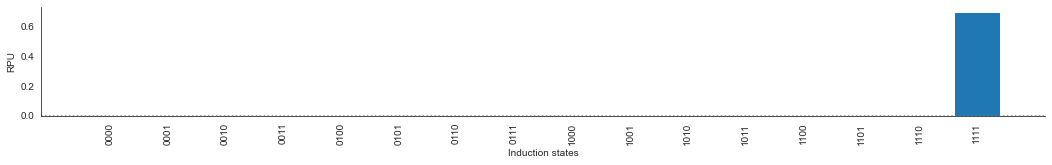

In [31]:
c = candidates[0][2]
plt.figure(figsize=[18, 2])
plt.bar(np.arange(16), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(16), [format(x, "04b") for x in np.arange(16)], rotation=90)
#plt.xticklabels(np.arange(64), rotation=90)
print(c[-1], np.max(c[:-1]), c[-1]/np.max(c[:-1]))
sns.despine()

In [34]:
[gates[i] for i in candidates[0][0]]

['e42x32NrdJ1', 'e17x30MjaKlbA', 'e15x32STIMPDH1']

#### Plotting 8-inputs AND gate

0.021809021749345875 0.012862011925101741 1.6956151087671583


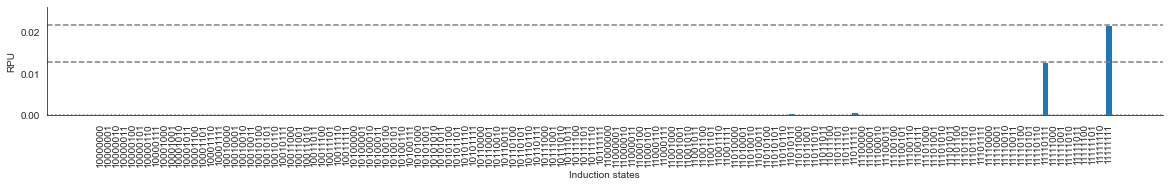

In [85]:
c = candidates[0][2][-128:]
plt.figure(figsize=[20, 2])
plt.bar(np.arange(128), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(128), [format(x, "08b") for x in np.arange(128, 256)], rotation=90)
plt.axhline(np.max(c[:-1]), linestyle='--', color='gray')
plt.axhline(c[-1], linestyle='--', color='gray')
#plt.xticklabels(np.arange(64), rotation=90)
max_yaxis = candidates[0][2][-1] * 1.2
plt.ylim([0, max_yaxis])
print(candidates[0][2][-1], np.max(candidates[0][2][:-1]), candidates[0][2][-1]/np.max(candidates[0][2][:-1]))
sns.despine()

0.021809021749345875 0.012862011925101741 1.6956151087671583


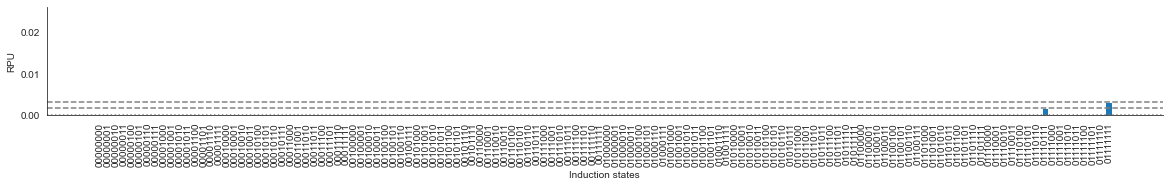

In [86]:
c = candidates[0][2][:128]
plt.figure(figsize=[20, 2])
plt.bar(np.arange(128), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(0, 128), [format(x, "08b") for x in np.arange(128)], rotation=90)
plt.axhline(np.max(c[:-1]), linestyle='--', color='gray')
plt.axhline(c[-1], linestyle='--', color='gray')
#plt.xticklabels(np.arange(64), rotation=90)
plt.ylim([0, max_yaxis])
print(candidates[0][2][-1], np.max(candidates[0][2][:-1]), candidates[0][2][-1]/np.max(candidates[0][2][:-1]))
sns.despine()

In [87]:
[gates[i] for i in candidates[0][0]]

['e32x30STPhoRadA',
 'e11x32NrdA2',
 'e41x30STsSspDnaX',
 'e38x33MjaKlbA',
 'e34x30STPhoRadA',
 'e15x30NpuSspS1',
 'e15x32STIMPDH1']

In [ ]:
c = candidates[0][2]
plt.figure(figsize=[18, 2])
plt.bar(np.arange(256), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
#plt.xticks(np.arange(256), [format(x, "08b") for x in np.arange(256)], rotation=90)
#plt.xticklabels(np.arange(64), rotation=90)
#print(candidates[0][2][-1], np.max(candidates[0][2][:-1]), np.log(candidates[0][2][-1]/np.max(candidates[0][2][:-1])))
#plt.ylim([0, 0.0004])
sns.despine()

### 2nd Optimization

In [ ]:
class GeneticAlgorithm2:

    def __init__(self, gates, inducers, hill_params, num_selection, population_size=100, elite_size=0.1, generations=30, mutation_rate=0.02):
        
        self.gates = gates
        self.inducers = inducers
        self.hill_params = hill_params
        self.num_selection = num_selection
        self.population_size = population_size
        self.num_elite = int(elite_size * population_size)
        self.generations = generations
        self.mutation_rate = mutation_rate
        
        self.best_populations = []
        
    def circuit_designer_4(self, gates):

        return {
            'name': 'circuit1',
            'sensors': ['sensor_{}'.format(i) for i in range(4)], #--> sensor name does not really matter
            'gates': [
                'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
                'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
                'AND({},{},{})'.format(gates[2], gates[0], gates[1])
            ]
        }
    
    def circuit_designer_8(self, gates):
         return {
            'name': 'circuit2',
            'sensors': ['sensor_{}'.format(i) for i in range(8)],
            'gates': [
                'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
                'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
                'AND({},{},{})'.format(gates[2], 'sensor_4', 'sensor_5'),
                'AND({},{},{})'.format(gates[3], 'sensor_6', 'sensor_7'),
                'AND({},{},{})'.format(gates[4], gates[0], gates[1]),
                'AND({},{},{})'.format(gates[5], gates[2], gates[3]),
                'AND({},{},{})'.format(gates[6], gates[4], gates[5])
            ]
         }
        
    def create_population(self):
    
        return [[np.random.uniform(0, 15) for _ in range(len(self.inducers))]
                for _ in range(self.population_size)] #repeated arrangement is allowed

    def calculate_fitness(self, population):

        fitness = []
        num_inputs = self.num_selection + 1
        input_states = [format(x, '0{}b'.format(num_inputs)) for x in list(range(2**num_inputs))]
        
        for indiv in population:
            
            outputs = []
            
            if num_inputs==4:
                circuit_design = self.circuit_designer_4([self.gates[i] for i in [4, 6, 1, 8, 2, 3, 0]])
            elif num_inputs==8:
                circuit_design = self.circuit_designer_8([self.gates[i] for i in [4, 6, 1, 8, 2, 3, 0]])

            for input_state in input_states:        
                induction_lvl = [inducer*int(j) for inducer, j in zip(indiv, input_state)]
                circuit = Circuit(circuit_design, induction_lvl, self.hill_params)
                circuit.signal_match()
                outputs.append(circuit.get_output())

            on = outputs[-1] #on state is always the last state
            max_off = np.max(outputs[:-1])
            dyn_range = np.log(on/max_off) if max_off!=0 else np.log(on/1e-50) #random denominator to avoid division with zero
            fitness.append(dyn_range)

        return fitness

    def rank_population(self, population):

        fitness = self.calculate_fitness(population)
        return sorted([(a, b) for a, b in zip(population, fitness)], key=lambda x: x[1], reverse=True)
    
    def selection(self, sorted_pop):

        #might need to define another selection method later
        selected_pop = []
        df = pd.DataFrame(sorted_pop, columns=['index', 'fitness'])
        df['cum_sum'] = df['fitness'].cumsum()
        df['cum_perc'] = 100 * df['cum_sum'] / df['fitness'].sum()

        for i in range(self.num_elite): #ellitists
            selected_pop.append(sorted_pop[i][0])

        for i in range(len(sorted_pop) - self.num_elite): #remainings
            pick = 100 * random.random()
            for i in range(len(sorted_pop)):
                if pick <= df.iat[i, 3]:
                    selected_pop.append(sorted_pop[i][0])
                    break

        return selected_pop
    
    def mating_pool(self, population):
    
        return [selected for selected in population] #might need some fixing?
    
    def crossover(parent1, parent2):

        child_p1 = []
        child_p2 = []
        gene_A = int(random.random() * len(parent1))
        gene_B = int(random.random() * len(parent1))
        start_gene = min(gene_A, gene_B)
        end_gene = max(gene_A, gene_B)
        child_p1 = [parent1[i] for i in range(start_gene, end_gene)]    
        child_p2 = [item for item in parent2 if item not in child_p1]
        child = child_p1 + child_p2

        return child

    def crossover_population(self, mating_pop):

        children = []
        non_elite = len(mating_pop) - self.num_elite
        pool = random.choices(mating_pop, k=len(mating_pop))

        for i in range(self.num_elite):
            children.append(mating_pop[i])

        for i in range(non_elite):
            child = crossover(pool[i], pool[len(mating_pop)-i-1])
            children.append(child[:self.num_selection])

        return children
    
    def mutate(self, individual):

        for swapped in range(len(individual)):
            if(random.random() < self.mutation_rate):
                swapwith = int(random.random() * len(individual))
                temp = individual[swapped]
                individual[swapped] = individual[swapwith]
                individual[swapwith] = temp
        return individual

    def mutate_population(self, population):
    
        return [self.mutate(indiv) for indiv in population]
    
    def next_generation(self, current_pop):
    
        ranked_pop = self.rank_population(current_pop)
        selected_pop = self.selection(ranked_pop)
        mating_pop = self.mating_pool(selected_pop)
        children = self.crossover_population(mating_pop)
        next_pop = self.mutate_population(children)
        return next_pop
    
    def best_individuals(self, num_indiv=1):
        
        return self.best_populations[:num_indiv]

    def run(self):

        pop = self.create_population()
        #init_pop = pop.copy()
        for i in range(self.generations):
            population = self.next_generation(pop)
        
        self.best_populations = self.rank_population(pop)

In [ ]:
pops = [50, 100, 200, 500]
gens = [10, 50, 100]
muts = [0.02, 0.1, 0.2]

results = []
for p in tqdm(pops):
    for g in gens:
        for m in muts:
            ga2 = GeneticAlgorithm2(gates, inducers, hill_params, 7,
                                  population_size=p,
                                  elite_size=0.2,
                                  generations=g,
                                  mutation_rate=m
                                 )
            ga2.run()
            best_fit = ga2.best_individuals(1)[0][1]
            config = p, g, m
            results.append((config, best_fit))

In [ ]:
df = pd.DataFrame(results, columns=['index', ('fitness')])
df['population'] = df['index'].apply(lambda x: x[0])
df['generation'] = df['index'].apply(lambda x: x[1])
df['mutation'] = df['index'].apply(lambda x: x[2])
df

In [ ]:
df[df['population']==50]['fitness']

In [ ]:
best23[0]

In [ ]:
def circuit_designer_4(gates):
    return {
        'name': 'circuit1',
        'sensors': ['sensor_{}'.format(i) for i in range(4)], #--> sensor name does not really matter
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], gates[0], gates[1])
        ]
    }

def circuit_designer_8(gates):
     return {
        'name': 'circuit2',
        'sensors': ['sensor_{}'.format(i) for i in range(8)],
        'gates': [
            'AND({},{},{})'.format(gates[0], 'sensor_0', 'sensor_1'),
            'AND({},{},{})'.format(gates[1], 'sensor_2', 'sensor_3'),
            'AND({},{},{})'.format(gates[2], 'sensor_4', 'sensor_5'),
            'AND({},{},{})'.format(gates[3], 'sensor_6', 'sensor_7'),
            'AND({},{},{})'.format(gates[4], gates[0], gates[1]),
            'AND({},{},{})'.format(gates[5], gates[2], gates[3]),
            'AND({},{},{})'.format(gates[6], gates[4], gates[5])
        ]
     }
    
def calculate_fitness(population):

    profile = []
    arrangement = [x[0] for x in population]
    num_inputs = 8
    input_states = [format(x, '0{}b'.format(num_inputs)) for x in list(range(2**num_inputs))]

    for indiv in arrangement:

        outputs = []
        if num_inputs==4:
            circuit_design = circuit_designer_4([gates[i] for i in [4, 6, 1, 8, 2, 3, 0]])
        elif num_inputs==8:
            circuit_design = circuit_designer_8([gates[i] for i in [4, 6, 1, 8, 2, 3, 0]])

        for input_state in input_states:          
            induction_lvl = [inducer*int(j) for inducer, j in zip(indiv, input_state)]
            circuit = Circuit(circuit_design, induction_lvl, hill_params)
            circuit.signal_match()
            outputs.append(circuit.get_output())

        on = outputs[-1] #on state is always the last state
        max_off = np.max(outputs[:-1])
        dyn_range = np.log(on/max_off) if max_off!=0 else np.log(on/1e-50) #random denominator to avoid division with zero
        profile.append((indiv, dyn_range, outputs))

    return profile

candidates = calculate_fitness(best23)

In [ ]:
c = candidates[0][2][-128:]
plt.figure(figsize=[20, 2])
plt.bar(np.arange(128), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(128), [format(x, "07b") for x in np.arange(128)], rotation=90)
plt.axhline(np.max(c[:-1]), linestyle='--', color='gray')
plt.axhline(c[-1], linestyle='--', color='gray')
#plt.xticklabels(np.arange(64), rotation=90)
print(candidates[0][2][-1], np.max(candidates[0][2][:-1]), np.log(candidates[0][2][-1]/np.max(candidates[0][2][:-1])))
sns.despine()

In [ ]:
candidates[0][0]a

In [ ]:
c = candidates[0][2][-128:]
plt.figure(figsize=[20, 2])
plt.bar(np.arange(128), c)
plt.axhline(0, linestyle='dotted', color='gray')
plt.ylabel('RPU')
plt.xlabel('Induction states')
#plt.yscale('log')
plt.xticks(np.arange(128), [format(x, "07b") for x in np.arange(128)], rotation=90)
plt.axhline(np.max(c[:-1]), linestyle='--', color='gray')
plt.axhline(c[-1], linestyle='--', color='gray')
#plt.xticklabels(np.arange(64), rotation=90)
print(candidates[0][2][-1], np.max(candidates[0][2][:-1]), np.log(candidates[0][2][-1]/np.max(candidates[0][2][:-1])))
sns.despine()

In [ ]:
candidates[0][0]